# Logistic Regression

In [1]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

#creating a Linear Regression object
regg = LogisticRegression(solver='lbfgs', max_iter = 1000)

[(1.0, 'label'),
 (0.8339210712008803, 'meanfun'),
 (0.6189155533391093, 'IQR'),
 (0.5114550479277904, 'Q25'),
 (0.49055224317109514, 'sp.ent'),
 (0.47953884005059305, 'sd')]

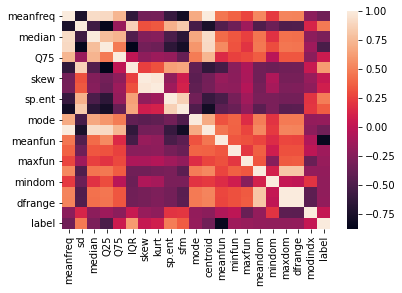

In [2]:
#Reading voice.csv using pandas's read_csv function
data=pd.read_csv('voice.csv')

#Redefining target as categorical values in DataFrame
data['label'] = data['label'].astype('category').cat.codes

#performing a correlation between all data
corr=data.corr()

#generating seaborn heatmap for co-relation between data
sns.heatmap(corr)

#creating a single correlation list and zipping it into tuples
corr_list =list(zip(abs(corr['label']),list(data.columns)))
#sorting the list in decending order based on keys
corr_list.sort(key=lambda x:x[0], reverse=True)
corr_list[:6]
#meanfun, IQR and Q25 has the most correlation other than the target itself

In [4]:
#Splitting the data into Train and Test data
xtr, xte, ytr, yte = train_test_split(data.iloc[:,:-1],data.iloc[:,-1:].values.ravel(), test_size=0.2)

#Fitting LogisticRegression
regg.fit(xtr,ytr)

#Predicting the target from test features. 
ypr=regg.predict(xte)

#Measuring the prediction score
print("Accuracy before removing highly correlated features: ", metrics.accuracy_score(ypr, yte))

Accuracy before removing highly correlated features:  0.8769716088328076


In [5]:
#Dropping a highly correlated columns
data = data.drop(columns=['meanfun','IQR','Q25'])

#Splitting the data into Train and Test data
xtr, xte, ytr, yte = train_test_split(data.iloc[:,:-1],data.iloc[:,-1:].values.ravel(), test_size=0.2)

#Fitting LogisticRegression
regg.fit(xtr,ytr)

#Predicting the target from test features. 
ypr=regg.predict(xte)

#Measuring the prediction score
print("Accuracy After removing highly correlated features(meanfun, IQR, Q25): ", metrics.accuracy_score(ypr, yte))

Accuracy After removing highly correlated features(meanfun, IQR, Q25):  0.7460567823343849
